In the first part of the project, you should work on retrieving, structuring, and cleaning data. Document your work in a jupyter notebook and in the final project report.

You will be using a subset of the FakeNewsCorpus dataset in your project, which is available from Absalon. You can also find more information about the full datasetLinks to an external site. and find information about how the data is collected, the available fields, etc.

Task 1: Your first task is to retrieve a sample of the FakeNewsCorpus from https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csvLinks to an external site. and structure, process, clean it. You should follow the methodology you developed in Exercise 1. When you have finished cleaning, you can start to process the text. NLTK (https://www.nltk.org/ Links to an external site.) has built-in support for many common operations. Try the following:

Tokenize the text.
Remove stopwords and compute the size of the vocabulary. Compute the reduction rate of the vocabulary size after removing stopwords.
Remove word variations with stemming and compute the size of the vocabulary. Compute the reduction rate of the vocabulary size after stemming.
Describe which procedures (and which libraries) you used and why they are appropriate.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter
from cleantext import clean
import re as regular_expression
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adamjohn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Task 1, part 1: Her åbner vi datafilen, som vi skal strukturere, behandle og cleane. 

   original_vocab_size  reduced_vocab_size_no_stopwords  \
0                  223                              169   
1                  122                               92   
2                  272                              234   
3                  255                              196   
4                  169                              122   

   reduction_rate_no_stopwords  reduced_vocab_size_stemming  \
0                     0.242152                          162   
1                     0.245902                           91   
2                     0.139706                          226   
3                     0.231373                          184   
4                     0.278107                          118   

   reduction_rate_stemming  
0                 0.273543  
1                 0.254098  
2                 0.169118  
3                 0.278431  
4                 0.301775  
Average reduction rate after removing stopwords: 21.77%
Average reduction rate after stemmin

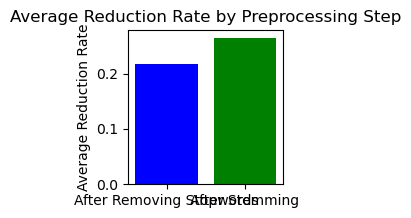

In [42]:
# Your cleaning function
def apply_clean(text):
    return clean(text, fix_unicode=False, to_ascii=False, lower=True, no_line_breaks=True,
                 no_urls=True, no_emails=True, no_phone_numbers=True, no_numbers=True, no_digits=True,
                 replace_with_url="<URL>", replace_with_email="<EMAIL>", replace_with_phone_number="<PHONE>",
                 replace_with_number="<NUMBER>", replace_with_digit="0", lang="en")

def remove_stopwords(token_list):
    stop_words = set(stopwords.words('english'))
    return [word for word in token_list if word not in stop_words]

def vocabulary_size(token_list):
    return len(set(token_list))

def compute_reduction_rate(original_size, reduced_size):
    reduction = (original_size - reduced_size) / original_size
    return reduction

def apply_stemming(token_list):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in token_list]

# Load the dataset
df = pd.read_csv('news_sample.csv')

df['tokens'] = df['content'].apply(lambda x: word_tokenize(apply_clean(str(x))))

stop_words = set(stopwords.words('english'))

def remove_stopwords(token_list):
    return [word for word in token_list if word not in stop_words]

df['tokens_no_stopwords'] = df['tokens'].apply(remove_stopwords)

def vocabulary_size(token_list):
    return len(set(token_list))

df['original_vocab_size'] = df['tokens'].apply(vocabulary_size)
df['reduced_vocab_size_no_stopwords'] = df['tokens_no_stopwords'].apply(vocabulary_size)

df['reduction_rate_no_stopwords'] = (df['original_vocab_size'] - df['reduced_vocab_size_no_stopwords']) / df['original_vocab_size']

stemmer = PorterStemmer()

def apply_stemming(token_list):
    return [stemmer.stem(word) for word in token_list]

df['stemmed_tokens'] = df['tokens_no_stopwords'].apply(apply_stemming)
df['reduced_vocab_size_stemming'] = df['stemmed_tokens'].apply(vocabulary_size)

df['reduction_rate_stemming'] = (df['original_vocab_size'] - df['reduced_vocab_size_stemming']) / df['original_vocab_size']

# Print the first few rows of the DataFrame to check the results
print(df[['original_vocab_size', 'reduced_vocab_size_no_stopwords', 'reduction_rate_no_stopwords', 
          'reduced_vocab_size_stemming', 'reduction_rate_stemming']].head())

# Print average reduction rates across all articles
average_reduction_rate_no_stopwords = df['reduction_rate_no_stopwords'].mean()
average_reduction_rate_stemming = df['reduction_rate_stemming'].mean()

print(f"Average reduction rate after removing stopwords: {average_reduction_rate_no_stopwords:.2%}")
print(f"Average reduction rate after stemming: {average_reduction_rate_stemming:.2%}")

# Example: Print the first 10 tokens of the first article
print("First 10 original tokens of the first article:")
print(df.loc[0, 'tokens'][:100])

# Print the first 10 tokens after removing stopwords
print("\nFirst 10 tokens of the first article after removing stopwords:")
print(df.loc[0, 'tokens_no_stopwords'][:100])

# Print the first 10 tokens after stemming
print("\nFirst 10 tokens of the first article after stemming:")
print(df.loc[0, 'stemmed_tokens'][:100])

# Plotting the average reduction rates
reduction_rates = [average_reduction_rate_no_stopwords, average_reduction_rate_stemming]
steps = ['After Removing Stopwords', 'After Stemming']

plt.figure(figsize=(2, 2))
plt.bar(steps, reduction_rates, color=['blue', 'green'])
plt.ylabel('Average Reduction Rate')
plt.title('Average Reduction Rate by Preprocessing Step')
plt.show()


Processing: